In [71]:
import pickle as pkl
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


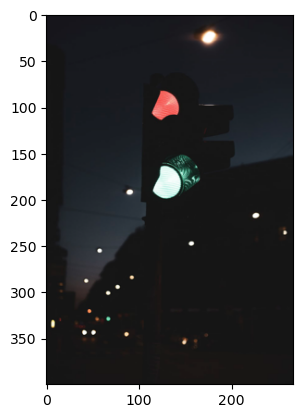

In [43]:
with open('images.pkl', 'rb') as f:
    images = pkl.load(f)

plt.imshow(images[0])

In [44]:
with open('target.pkl', 'rb') as f:
    labels = pkl.load(f)

print(labels[0])

trafficlight


In [45]:
# Get all the sizes into a list, then convert to a set
sizes = set([img.shape for img in images])
print(sizes)

{(273, 400, 3), (257, 400, 3), (235, 400, 3), (400, 267, 3), (400, 300, 3), (248, 400, 3), (270, 400, 3), (246, 400, 3), (400, 306, 3), (385, 400, 3), (242, 400, 3), (266, 400, 3), (244, 400, 3), (222, 400, 3), (267, 400, 3), (400, 332, 3), (268, 400, 3), (400, 268, 3), (166, 400, 3), (290, 400, 3), (229, 400, 3), (228, 400, 3), (301, 400, 3), (269, 400, 3), (281, 400, 3), (400, 321, 3), (200, 400, 3), (400, 266, 3), (302, 400, 3), (400, 400, 3), (252, 400, 3), (337, 400, 3), (293, 400, 3), (265, 400, 3), (300, 400, 3), (247, 400, 3), (225, 400, 3), (272, 400, 3), (364, 400, 3), (400, 395, 3), (283, 400, 3), (400, 320, 3), (227, 400, 3), (400, 254, 3), (284, 400, 3), (274, 400, 3)}


In [46]:
sizes_df = pd.DataFrame([[img.shape[0], img.shape[1]] for img in images], columns=['height', 'width'])
sizes_df['height'].value_counts()

height
400    782
267     31
301     13
300      7
225      5
269      4
228      2
247      2
266      2
273      2
283      2
293      1
222      1
166      1
244      1
252      1
337      1
281      1
265      1
302      1
235      1
200      1
274      1
246      1
364      1
385      1
242      1
272      1
270      1
290      1
284      1
268      1
257      1
229      1
248      1
227      1
Name: count, dtype: int64

In [47]:
sizes_df['width'].value_counts()

width
300    731
400     99
267     29
320      6
268      5
266      2
306      1
321      1
395      1
254      1
332      1
Name: count, dtype: int64

In [49]:
images[0].shape

(400, 267, 3)

In [50]:
target_size = (300, 400)

cv2.resize(images[0], (300, 400)).shape

(400, 300, 3)

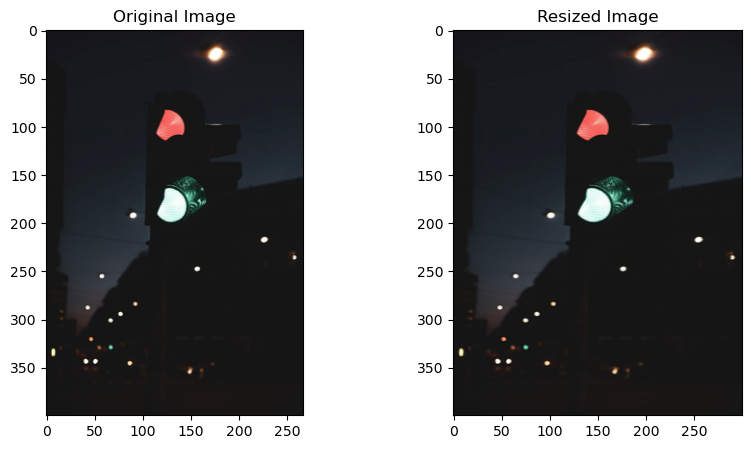

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(images[0])
axes[0].set_title('Original Image')
axes[1].imshow(cv2.resize(images[0], (300, 400)))
axes[1].set_title('Resized Image')
plt.show()

In [52]:
resized_images = [cv2.resize(img, target_size) for img in images]
sizes = set([img.shape for img in resized_images])
print(sizes)

{(400, 300, 3)}


In [54]:
resized_images[0]

array([[[22, 21, 27],
        [22, 21, 27],
        [22, 21, 27],
        ...,
        [22, 21, 27],
        [22, 21, 27],
        [22, 21, 27]],

       [[22, 21, 27],
        [22, 21, 27],
        [22, 21, 27],
        ...,
        [22, 21, 27],
        [22, 21, 27],
        [22, 21, 27]],

       [[22, 21, 27],
        [22, 21, 27],
        [22, 21, 27],
        ...,
        [22, 21, 27],
        [22, 21, 27],
        [22, 21, 27]],

       ...,

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[21, 21, 21],
        [21, 21, 21],
        [21, 21, 21],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]]], dtype=uint8)

In [53]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in resized_images]
float_images[0]

array([[[22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.],
        ...,
        [22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.]],

       [[22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.],
        ...,
        [22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.]],

       [[22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.],
        ...,
        [22., 21., 27.],
        [22., 21., 27.],
        [22., 21., 27.]],

       ...,

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.],
        ...,
        [21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]],

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.],
        ...,
        [21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]],

       [[21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.],
        ...,
        [21., 21., 21.],
        [21., 21., 21.],
        [21., 21., 21.]]

In [58]:
# Normalize images to a range between 0 and 1 by dividing all pixel values by the max of 255
normalized_images = [img/255 for img in float_images]
normalized_images[0]

array([[[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       ...,

       [[0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0

In [69]:
X = np.array(normalized_images)
X[0]

array([[[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       [[0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        ...,
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235],
        [0.08627451, 0.08235294, 0.10588235]],

       ...,

       [[0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0.08235294, 0.08235294],
        [0.08235294, 0

In [65]:
y_encoder = LabelEncoder().fit(labels)
y = y_encoder.transform(labels)
y[:100]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [70]:
# Split the training dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Define the augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),         # Random rotation (20 degrees)
    tf.keras.layers.RandomTranslation(0.1, 0.1), # Random horizontal and vertical shift
    tf.keras.layers.RandomZoom(0.2),             # Random zoom
    tf.keras.layers.RandomFlip('horizontal')     # Random horizontal flip
])

In [73]:
# Create an empty list for X and y augmentations
X_train_aug = []
y_train_aug = []

# Loop through the entire X_train set
for i in range(len(X_train)):
    # Select the original image and its y label
    img = X_train[i]
    label = y_train[i]

    # Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Add 5 new images for every original
    for j in range(5):
        # Create and append the image
        X_train_aug.append(data_augmentation(img, training=True)[0].numpy())
        # Append the original label
        y_train_aug.append(label)

# Print the length of the augmented images and the labels
print(len(X_train_aug))
print(len(y_train_aug))

3505
3505


In [75]:
# Create a dictionary to store the train/test data
data = {
    'X_train': X_train_aug,
    'X_test': X_test,
    'y_train': y_train_aug,
    'y_test': y_test
}

# Save the dictionary to a pickle file
with open('signs_dict.pkl', 'wb') as f:
    pkl.dump(data, f)